In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Método de Shooting Tiro parabólico amortiguado


El código desarrollado puede ser utilizado y editado en la hoja de Google Colab en el siguiente link

<br>

<a href="https://colab.research.google.com/github/lauramscs/Metodos-numericos/blob/main/Shooting_Tiro_parabolico_Amortiguado.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


Vamos a partir implementando el RK4 construido anteriormente para obtener la trayectoria de una partícula dadas las condiciones iniciales $x_0$, $y_0$, $vx_0$ y $vy_0$

In [2]:
def rk4(t0, tf, x0, f, h):
    t = arange(t0,tf+h,h)
    x = zeros((size(t), size(x0)))
    x[0] = x0
    
    for (n, tn) in enumerate(t[:-1]):        
        k1 = f(tn, x[n])
        k2 = f(tn + h/2, x[n] + h*k1/2)
        k3 = f(tn + h/2, x[n] + h*k2/2)
        k4 = f(tn + h, x[n] + h*k3)     
        x[n+1] = x[n] + h*(k1 + 2*k2 + 2*k3 + k4)/6    
    return t, x

Este problema no tiene solución analítica (https://core.ac.uk/download/pdf/82261706.pdf)

$$\mathbf{F}=-\mathbf{g}-b^*v^2\hat{\mathbf{v}}$$

Consiste en el problema de un par de ecuaciones diferenciales ordinarias de segundo orden y acopladas:

$$m\frac{d^2x}{dt^2}=-b^* v_x\sqrt{v_x^2+v_y^2}$$
$$m\frac{d^2y}{dt^2}=-mg-b^* v_y\sqrt{v_x^2+v_y^2}$$

$$b = b^*/m$$

In [3]:
def para (t, v):
     #Definimos la funcion para que depende del tiempo t y v el arreglo que guarda a los parámetros x, y,vx y vy
    l = zeros_like(v)
    l[0] = v[2]
    l[1] = v[3]
    l[2] = -b*v[2]* sqrt(v[2]**2 +v[3]**2)
    l[3] = -g -b*v[3] *sqrt(v[2]**2 +v[3]**2)
    return l
#nos regresa un arreglo con entradas $x', y', x'', ''$

In [4]:
g= 9.8
b=0.5
#fijamos las constantes g y b

In [5]:
t, v =rk4(0.0, 1, array([0,0,10,10]) ,para, 1e-2)
#aplicamos rk4 a para de t0=0.1 a tf=1 con la condición inicial v0=(x0=0, y0=0, vx0=10, vy0=10) y un paso h=1e-2

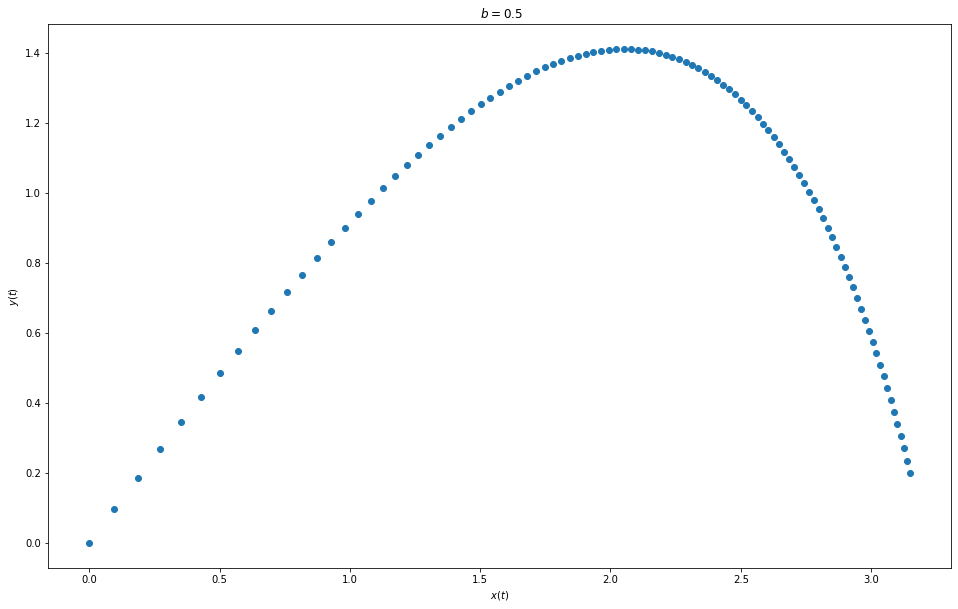

In [6]:
fig, ax = subplots(figsize = (16.18,10))
ax.set_title(" $b = 0.5$")
ax.set_xlabel(r"$x(t)$")
ax.set_ylabel(r"$y(t)$")
ax.scatter(v.T[0], v.T[1])
plt.show()

## Método de Shooting

Iniciamos haciendo el código para el Newton-Raphson

In [7]:
def NR(f,g,x0,y0,dV,tolf): #Tenemos un sistema de 2x2. 
    #El Newton Raphson depende de las dos funciones,el valor incial de las variables, dV y la tolerancia 
    J=zeros((2,2)) #El Jacobiano será una matriz de 2x2
    x,y=x0,y0
    errf=abs(f(x,y))+abs(g(x,y))
    #Defonimos como el error al valor absoluto de las funciones f y g evaluadas en el mismo punto (x,y)
    while errf>tolf:   #El ciclo seguirá siempre que el error sea mayor a la tolerancia
        J[0,0]=(f(x+dV,y)-f(x,y))/dV    #Se obtienen uno a uno los términos del Jacobiano
        J[0,1]=(f(x,y+dV)-f(x,y))/dV
        J[1,0]=(g(x+dV,y)-g(x,y))/dV
        J[1,1]=(g(x,y+dV)-g(x,y))/dV
        Jinv=inv(J)
        deltax=-Jinv[0,0]*f(x,y)-Jinv[0,1]*g(x,y)
        deltay=-Jinv[1,0]*f(x,y)-Jinv[1,1]*g(x,y)
        x=x+deltax
        y=y+deltay
        #Obtuvimos los nuevos puntos x, y en los que se evaluarán las funciones f y g
        errf=abs(f(x,y))+abs(g(x,y))
    return x,y  #Nos regresa los puntos x, y en los que la diferencia de las funciones es menor a la tolerancia

In [8]:
T0=0    #FIJA SISTEMA DE COORDENADAS
X0=0
Y0=0

TF=1.0   

dT=1e-3    

XF=10   #Puntos xf, yf para los cales queremos obtener vx0, vy0 partiendo de x0, y0, to fijados arriba
YF=0


In [9]:
#Definimos dos funciones func y gunc. Las cuales regresan la diferencia entre el último valor 
#de x,y obtenidos en el Runge-kutta y xf, yf fijados anteriormente

def func(VX0,VY0):
    tt, vv =rk4(T0, TF, array([X0,Y0,VX0,VY0]) ,para, dT)
    diffx = vv[-1,0]-XF 
    return diffx

def gunc(VX0,VY0):
    tt, vv =rk4(T0, TF, array([X0,Y0,VX0,VY0]) ,para, dT) 
    diffy = vv[-1,1]-YF
    return diffy

In [10]:
VXseed=10
VYseed=10
#Damos una semilla para VX y VY

In [11]:
func(VXseed,VYseed)


-6.850740272970777

In [12]:
gunc(VXseed,VYseed)

0.19919782194231447

In [13]:
#La solución nos dará un valor para V0X y V0Y  tales que func y gunc se vayan a cero
Sol = NR(func,gunc,VXseed,VYseed,1e-4,1e-6)
Sol

(340.4845558467298, 79.35704330364403)

Para comprobar la solución obtenida aplicamos RK4 al tiro parabólico con nuestras conciciones iniciales y sustituimos las velocidades inciales obtenidas con el Newton-Raphson

In [14]:
t, v =rk4(0.0, 1, array([0,0,340.4845558467298,79.35704330364403]) ,para, 1e-3)

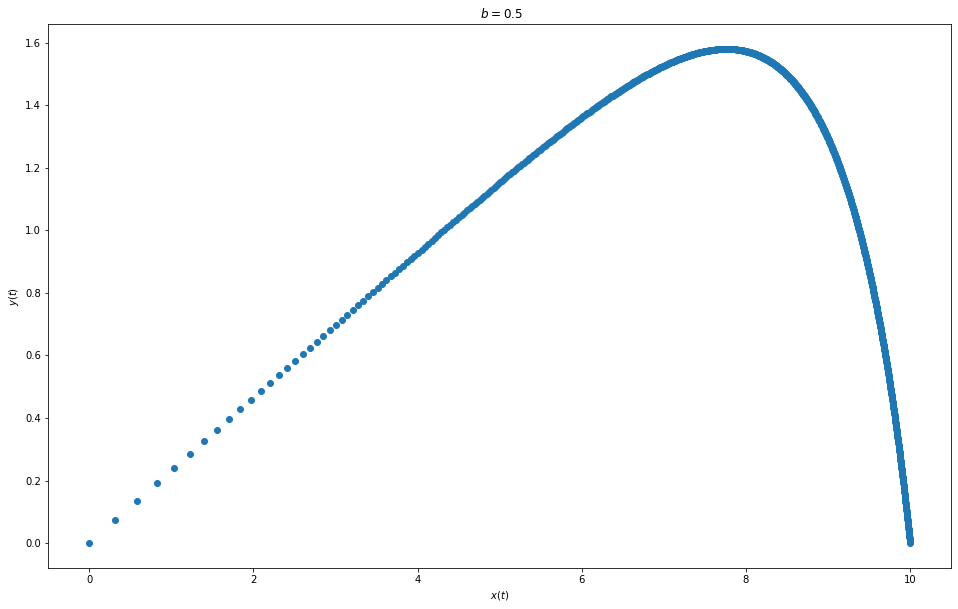

In [15]:
fig, ax = subplots(figsize = (16.18,10))
ax.set_title(" $b = 0.5$")
ax.set_xlabel(r"$x(t)$")
ax.set_ylabel(r"$y(t)$")
ax.scatter(v.T[0], v.T[1])
plt.show()

Observamos que efectivamente, con esas velocidades inicales la partícula llega a (x,y)=(10,0)